In [108]:
# imPORT LIBRARIES 
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from math import pi, sqrt
import handcalcs.render
import pandas as pd
import json 
# !pip install handcalcs

In [109]:
# CONFIGURATIONS
#help(handcalcs.set_option)
handcalcs.set_option("latex_block_start", "$")
handcalcs.set_option("latex_block_end", "$")
handcalcs.set_option("math_environment_end", "aligned")
handcalcs.set_option("use_scientific_notation",True)
#handcalcs.set_option("line_break", "\\\\[20pt]")
#handcalcs.set_option("param_columns", 1)

#handcalcs.set_option("math_environment_start", "aligned")
#handcalcs.set_option("math_environment_end", "aligned")
#handcalcs.set_option("line_break", r"<br>")
#handcalcs.set_option("line_break", r"\\")

In [110]:
from localcode2 import *
fig_counter=1

In [111]:
import warnings
warnings.filterwarnings("ignore")


# Design of Magnetic Cores Lm and Lr

## Inputs and claculated parameters

In [112]:
with open("../01_llc_tank/04_outputs/inp_datas.json", "r", encoding="utf-8") as f:
    inp_datas = json.load(f)
#print("Input datas:")
#print("="*20)
#display(inp_datas)
S= pd.Series(inp_datas, name = "Input datas").to_frame()
#display(S)
#print(inp_datas)
with open("../01_llc_tank/04_outputs/out_results.json", "r", encoding="utf-8") as f:
    out_datas = json.load(f)
#print("Output datas:")
#print("="*20)
#display(out_datas)

S= pd.Series(out_datas, name = "Output datas").to_frame()
#display(S)
#print("\n")
#print(out_datas)


# Load variables 
for key, value in inp_datas.items():
    globals()[key] = value
for key, value in out_datas.items():
    globals()[key] = value

In [113]:
import math 
def dic_show(out_datas, nb_cols = 3):
    keys = list(out_datas.keys())
    values = list(out_datas.values())
    
    # Compute number of rows needed
    Nbindex = math.ceil(len(keys) / nb_cols)
    
    # Prepare a dictionary for DataFrame
    data_dict = {}
    for i in range(nb_cols):
        # Slice keys and values for this column
        col_keys = keys[i*Nbindex:(i+1)*Nbindex]
        col_values = values[i*Nbindex:(i+1)*Nbindex]
        
        # Pad with empty strings if necessary
        while len(col_keys) < Nbindex:
            col_keys.append("")
            col_values.append("")
        
        # Add two columns per logical column: "Name" and "Value"
        data_dict[f"Name_{i+1}"] = col_keys
        data_dict[f"Value_{i+1}"] = col_values
    
    # Create DataFrame
    df = pd.DataFrame(data_dict)
    print(df.to_string(index=False, header=False))


In [114]:
dic_show(inp_datas, 4)
print("\n")
dic_show(out_datas, 4)

V_In_min 360.0 V_In_max 400.0 Vo_nom 48.0 Power   1200.0
V_In_nom 380.0   Vo_min  42.0 Vo_max 54.0 f_nom 100000.0


  Lnc   3.000   Lm_uH     65.392     Ioe_rms  7.636 Re_110    22.637
  Qec   0.550 fsw_min  60170.000     Ios_rms 30.545     Cr       0.0
Cr_nF 116.209 fsw_max 156220.000      Ir_rms 10.354     Lr  0.000022
    n   4.000  Im_rms      6.992 L_second_uH  4.087     Lm  0.000065
Lr_uH  21.797      Io     25.000      Re_nom 24.901                 


## Transformer design

In [210]:
with open("../01_llc_tank/04_outputs/out_results.json", "r", encoding="utf-8") as f:
    out_datas = json.load(f)


# Load variables 
for key, value in out_datas.items():
    globals()[key] = value
    
params = ['n',  'Lm_uH', 'fsw_min', 'fsw_max', 'Ir_rms', 'Im_rms', 'Ioe_rms', 'Ios_rms', 'L_second_uH']

dic_transfo= {x:out_datas[x] for x in params}
Al = out_datas["Lm_uH"]/out_datas["n"]**2
dic_transfo["Al_uH"]= Al

S= pd.Series(dic_transfo, name = "Transormer parameters").to_frame()
display(S)

,Transormer parameters
n,4.000
Lm_uH,65.392
fsw_min,60170.000
fsw_max,156220.000
Ir_rms,10.354
Im_rms,6.992
Ioe_rms,7.636
Ios_rms,30.545
L_second_uH,4.087
Al_uH,4.087


**Bpeak formula**

$$
B_{peak} = \frac{L_m \cdot Im_{peak}}{N_p \cdot A_e}= \frac{L_m \cdot \sqrt{2} \cdot  Im_{rms}}{N_p \cdot A_e}
$$

Where
- `A_e` = effective core area (in m²)
- `N_p` = primary turns


The `Al` value: 

In [211]:
%%render long
Al_nH= 1e3*Lm_uH/n**2 # nH/turn squared

<IPython.core.display.Latex object>

We can reduce $A_L$ by adding an air gap, below the formula of air gap length

$$
A_{L}' = \frac{A_L}{1 + \mu_r \,\frac{L_g}{L_e}}
$$

$$
l_g = \frac{L_e}{\mu_r} \left( \frac{A_L}{A_L'} - 1 \right)
$$

Where
- $ A_{L}' $ : the corrected inductance factor (in nH or µH), after introducing the air gap
- $ A_L $ : the initial inductance factor provided by the core manufacturer (in nH or µH)
- $ l_g $ : the air gap length (in mm)
- $ L_e $ : the effective magnetic path length of the core (in mm)




### Core ELP 64/10/50 with I 64/5/50

#### Inputs data

In [212]:
%%render 
core = "" #ELP 64/10/50 with I 64/5/50
Al_nH= 14000 # nH
A_e= 519 # mm2
A_e_min= 518 # mm2
l_e=69.7 # mm


<IPython.core.display.Latex object>

In [213]:
%%render 
mu_r=1450 # N87
B_sat=300 # mT @ 250A/m 10kHz 100°C
K1= 835 # @ 25°C, 0.10 mm < s < 2.00 mm
K2= -0.79 # @ 25°C, 0.10 mm < s < 2.00 mm
mu_0 = 4*pi *1e-7 # H m−1 

<IPython.core.display.Latex object>

#### The air gap 

In [214]:
%%render 
Lm_nH= Lm_uH*1e3 # nH
Al_nH # nH
Al_Target = Lm_nH/n**2 # nH
mu_eTarget = mu_r*Al_Target/Al_nH

<IPython.core.display.Latex object>

**Simified formula of air gap**

See the formula above 

In [215]:
%%render long 
l_g = 1e3*((mu_0*n**2*A_e*1e-6)/Lm -l_e*1e-3/mu_r) # mm

<IPython.core.display.Latex object>

**TDK formula of air gap using K1 and K2**

In [216]:
fig_counter =  One_figure_with_captions(fig_counter,
                                        img1="Air_Gap_TDK_Formula.png", 
                                        caption1="The empirical air-gap formula using the coefficients K1 and K2 from the TDK datasheet", 
                                        first_part_path="./02_figs/", 
                                        width=18)
    

See page 6 [\[1\]](#referencesID1232).


In [217]:
%%render long
s_mm= (Al_Target/K1)**(1/K2) # mm airgap 

<IPython.core.display.Latex object>

**TDK air gap curve**

In [218]:
fig_counter =  One_figure_with_captions(fig_counter,
                                        img1="Air_Gap_TDK_curve.png", 
                                        caption1="The empirical air-gap formula using the coefficients K1 and K2 from the TDK datasheet", 
                                        first_part_path="./02_figs/", 
                                        width=10)
    

See page 2 [\[2\]](#referencesID1233).

In [219]:
%%render 
l_g_curve = 0.140 # mm

<IPython.core.display.Latex object>

**Air gap using the tree methods**

In [220]:
%%render 
s_mm # mm using TDK formula K1, K2
l_g # mm using the simple formula
l_g_curve # mm using TDK graph 

<IPython.core.display.Latex object>

The three results are close to each other; we will prefer the TDK formula using K1 and K2 if these coefficients are provided in the datasheet.

#### The Bpeak and Bsat

***Reluctance formulas***

In [221]:
%%render
mu_e = (l_e+l_g)/(l_g+l_e/mu_r)

<IPython.core.display.Latex object>

In [222]:
%%render long
R_core = l_e*1e-3/(mu_0*mu_r*A_e*1e-6) 
R_gap = 1e-3*l_g/(mu_0*A_e*1e-6)

<IPython.core.display.Latex object>

In [223]:
%%render long
R_tot= R_core+R_gap # At/Wb, using Rcore, Rgap
R_tot_2= 1e-3*(l_g+l_e)/(mu_0*mu_e*A_e*1e-6)# At/Wb, using µe 

<IPython.core.display.Latex object>

In [224]:
%%render long
Im_sat= B_sat*1e-3*A_e*1e-6*(R_core+R_gap)/n # A

<IPython.core.display.Latex object>

In [225]:
%%render  
Im_peak = sqrt(2)*Im_rms # A

<IPython.core.display.Latex object>

$ I_{m_{peak}} > I_{m_{sat}} $, let’s double-check our hypothesis and margins.

#### Verification of the Hypothesis

In [226]:
%%render 
Vf=0.2 # drop voltage in the mos
efficiency = 0.95 # Hypothesis, efficiency= 95\%

<IPython.core.display.Latex object>

In [227]:
%%render  long
loss = (1-efficiency)/3 # Hypothesis: Joule loss = 1/3 of total losses


<IPython.core.display.Latex object>

In [228]:
%%render 
Io_nom = Power/Vo_nom # A
V_loss = ((Power*loss)/efficiency)/Io_nom # v

<IPython.core.display.Latex object>

In [229]:
%%render long
margin = 0.01
Mg_max = n*(Vo_max*(1+margin)+Vf+V_loss)/(V_In_min/2)


<IPython.core.display.Latex object>

In [230]:
%%render 
# 110% load
Mg_max110 = Mg_max*(110/100)

<IPython.core.display.Latex object>

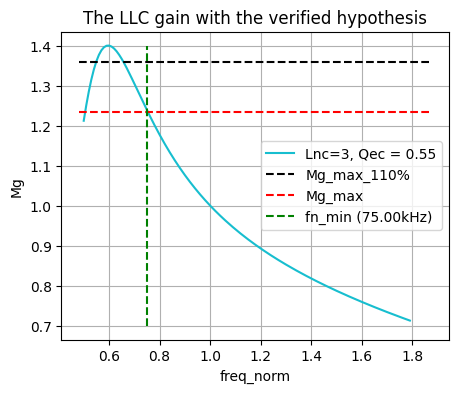

In [231]:
def calculate_Mg(Ln, fn, Qe):
    numerator = Ln * fn**2
    denominator_real = (Ln + 1) * fn**2 - 1
    denominator_imag = (fn**2 - 1) * fn * Qe * Ln
    denominator = np.sqrt(denominator_real**2+ denominator_imag**2)
    Mg = abs(numerator / denominator)
    return Mg
freqn = np.arange(0.5,1.8,0.01) 
Lnc=3 
Qec = 0.55 
Mg = calculate_Mg(Lnc,freqn, Qec)

i= np.argmin(np.abs(Mg-Mg_max))
fn_MgMin= freqn[i]

f_nom = 100e3 # Hz
fn_min = fsw_min/f_nom
fn_max = fsw_max/f_nom
fmin_2=fn_MgMin*f_nom
fig, ax = plt.subplots(figsize=(5, 4)) 
ax.plot(freqn, Mg,label = "Lnc=3, Qec = 0.55" , c="C9")

ax.plot([fn_min*0.8,fn_max*1.2 ], [Mg_max110, Mg_max110],
       label = "Mg_max_110%", linestyle ="--", c="k")
ax.plot([fn_min*0.8,fn_max*1.2], [Mg_max,Mg_max ],
      label = "Mg_max", linestyle ="--", c="r")



ax.plot([fn_MgMin,fn_MgMin], [0.7, 1.4],
        label = f"fn_min ({fmin_2/1e3:.2f}kHz)", linestyle ="--", c="g")


ax.set_xlabel("freq_norm")
ax.set_ylabel("Mg")
ax.set_title("The LLC gain with the verified hypothesis")
ax.legend()
ax.grid()

In [232]:
%%render long
fmin_2=fn_MgMin*f_nom
omega_min=2*pi*fmin_2
Im_rms2 = 2*sqrt(2)*n*Vo_nom/(pi*Lm*omega_min) # Arms

<IPython.core.display.Latex object>

In [233]:
%%render  
Im_peak2 = sqrt(2) * Im_rms2 # A

I_satMargin = 100*(Im_sat-Im_peak2)/Im_sat # \%

<IPython.core.display.Latex object>

In [234]:
Np = n

We can calculate also $B_{peak2}$ using $Im_{rms2}$

In [235]:
%%render long
B_sat # mT
B_peak2 = 1e3*Lm*sqrt(2)*Im_rms2 /(n*A_e_min*1e-6) # mT < Bs= 300mT OK


<IPython.core.display.Latex object>

We calculate the margin for $B_{peak2}$

In [236]:
%%render long
B_satMargin = 100*(B_sat-B_peak2)/B_sat # \%

<IPython.core.display.Latex object>

The calculation $I_{m,\text{sat}} / I_{m,\text{peak}}$ and $B_{\text{peak}} / B_{\text{sat}}$ are equivalent, see the result below

In [237]:
%%render
I_satMargin # \%
B_satMargin # \%

<IPython.core.display.Latex object>

In [238]:
# we will shose 
# ELP 64/10/50 with ELP 64/10/50 N95

In [239]:
# ELP 64/10/50 with I 64/5/50

### Other cores

Let’s apply the same formula to other cores, using the datasheet information shown below.

In [240]:
dfcores = pd.read_csv("03_data/FerriteCores.csv",sep=";").iloc[:,:-3]

mask  = dfcores["Bsat mT"].isna()
dfcores.loc[mask, "Bsat mT"] = 300
dfcores

,core,Aemin(mm2),Le(mm),Ve(mm3),Bsat mT,Loss (W/set),K1,K2,µe,Al(nH),price by set
0,E64/10/50-3C95,519.0,79.9,40700,330.0,20.0,NaN,NaN,NaN,17000,11.05
1,ELP 43/10/28 with I 43/4/28 N87,217.0,50.8,11430,350.0,7.8,390.0,-0.784,1480.0,850,2.61
2,ELP 64/10/50 with I 64/5/50 N87,512.0,69.7,36200,300.0,4.8,835.0,-0.790,1450.0,14000,NaN
3,ELP 64/10/50 with ELP 64/10/50 N95,518.0,79.9,41500,320.0,5.1,NaN,NaN,1880.0,15500,14.52
4,ELP 64/10/50 with ELP 64/10/50 N87,518.0,79.9,41500,300.0,5.5,820.0,-0.767,1490.0,12500,11.27
5,E64/10/50 + PLT64/50/5 3C95,519.0,69.7,35500,330.0,17.0,NaN,NaN,NaN,18500,NaN
6,ER64/13/51-3C92 3C95,507.0,93.0,52600,330.0,25.0,NaN,NaN,NaN,17100,19.62
7,E100/60/28 N87,690.0,274.0,201390,300.0,4.7,NaN,NaN,1930.0,6500,17.40
8,ELP 102/20/38 with ELP 102/20/38 N87,524.5,147.6,79410,300.0,11.0,NaN,NaN,1790.0,8200,12.88
9,ELP 102/20/38 with ELP 102/20/38 N97,524.5,147.6,79410,300.0,9.7,NaN,NaN,1855.0,8500,14.07


The table below shows the calculated saturation current and air gap of each core.

In [241]:
arr=[]
for i in range(len(dfcores)):
    mu_0 = 4*pi *1e-7 # H m−1 
    A_e = dfcores.loc[i, "Aemin(mm2)"]
    l_e = dfcores.loc[i, "Le(mm)"]
    B_sat = dfcores.loc[i, "Bsat mT"]
    mu_r = dfcores.loc[i, "µe"]
    #dfcores.loc[i, "Al(nH)"]
    K1 = dfcores.loc[i, "K1"]
    K2 = dfcores.loc[i, "K2"]
    core = dfcores.loc[i, "core"]


    Ae= A_e*1e-6 # m2
    le=l_e*1e-3 # m
    l_g = (mu_0*n**2*Ae)/Lm -le/mu_r
    lg = l_g*1e3
    l_g= lg
    
    
    mu_e = (l_e+l_g)/(l_g+l_e/mu_r)
    R_core = l_e/(mu_0*mu_r*A_e)
    R_gap = l_g/(mu_0*A_e)
    R_tot= R_core+R_gap
    R_tot_2= (l_g+l_e)/(mu_0*mu_e*A_e)# Using µe
    
    
    Im_sat= B_sat*Ae*(R_core+R_gap)/n # A

    arr.append({"core": core,"Im_sat": Im_sat,  "l_g":l_g})
res =pd.DataFrame(arr)
res

,core,Im_sat,l_g
0,E64/10/50-3C95,NaN,NaN
1,ELP 43/10/28 with I 43/4/28 N87,4.645828,0.032397
2,ELP 64/10/50 with I 64/5/50 N87,9.395645,0.109357
3,ELP 64/10/50 with ELP 64/10/50 N95,10.139467,0.116770
4,ELP 64/10/50 with ELP 64/10/50 N87,9.505750,0.105646
5,E64/10/50 + PLT64/50/5 3C95,NaN,NaN
6,ER64/13/51-3C92 3C95,NaN,NaN
7,E100/60/28 N87,12.662099,0.070187
8,ELP 102/20/38 with ELP 102/20/38 N87,9.625031,0.078811
9,ELP 102/20/38 with ELP 102/20/38 N97,9.625031,0.081700


And the peak current is: 

In [242]:
%%render 
Im_peak2  # A

<IPython.core.display.Latex object>

Below are the cores where the peak current is lower than the saturation current.

In [243]:
m= res.Im_sat>Im_peak2
dfplot = res[m]
dfplot["I_sat_Margin %"]=100*((dfplot["Im_sat"]-Im_peak2 )/dfplot["Im_sat"])
dfplot.sort_values("I_sat_Margin %")

,core,Im_sat,l_g,I_sat_Margin %
2,ELP 64/10/50 with I 64/5/50 N87,9.395645,0.109357,15.565680
4,ELP 64/10/50 with ELP 64/10/50 N87,9.505750,0.105646,16.543684
9,ELP 102/20/38 with ELP 102/20/38 N97,9.625031,0.081700,17.577938
8,ELP 102/20/38 with ELP 102/20/38 N87,9.625031,0.078811,17.577938
10,ELP 102/20/38 with I 102/7/38 N97,9.803034,0.094596,19.074557
3,ELP 64/10/50 with ELP 64/10/50 N95,10.139467,0.116770,21.759704
7,E100/60/28 N87,12.662099,0.070187,37.347287


`E100/60/28 N87` is not a planar core for pcb transformer. 
<br> so the choice will be between :
`ELP 64/10/50 with ELP 64/10/50 N95` and `ELP 102/20/38 with I 102/7/38 N97`

### Choice of the transformer core ELP 64 vs ELP 102

Below the 2D of cores ELP 64  and ELP 102

In [244]:
first_part_path = "./02_figs/"

fig_counter = show_figure_pair_with_captions(
    fig_counter, 
    "ELP641050.png",
    "ELP 64/10/50 TDK core",
    "ELP1022050.png",
    "ELP 102/20/38 TDK core", 
    first_part_path= first_part_path, 
)

In [245]:
def ipc2221current(wmm, thicknessum, DT= 30, kind = "outer"):
  wmil =wmm /0.0254
    # mm to milis, converting thickness in micrometers (µm) to mils (thousandths of an inch).
    # 1 mil=0.001 inch
    # 1 inch = 25.4 mm= 25400 um
  thmil = thicknessum /(0.0254*1000)
  areamils = wmil*thmil
  #print2(areamils)
  if kind =="outer":
    k = 0.048
  if kind =="inner":
    k = 0.024
  I = k*(DT**0.44) *(areamils**0.725)
  return I

Below some dimensions of ELP 102 and ELP 64 and a figure show the PCB trace and the margin of a PCB layer

In [246]:
df = pd.DataFrame([
    { "core":"ELP 102","E":86,"F":14,"Margin":4},
    { "core":"ELP 64","E":53.6,"F":10.2,"Margin":4}
])
df

,core,E,F,Margin
0,ELP 102,86.0,14.0,4
1,ELP 64,53.6,10.2,4


In [247]:


first_part_path = "./02_figs/"

fig_counter = show_figure_pair_with_captions(
    fig_counter, 
    "ELP_cores.png",
    "ELP set, TDK, some mechanical dimensions",
    "copperTrace.png",
    "ELP PCB trace (one PCB layer)", 
    first_part_path= first_part_path, 
)


See page 2 [\[4\]](#referencesID125).

We will use the below formula to calculate the maximum alowed current for pcb trace

In [248]:
fig_counter =  One_figure_with_captions(fig_counter,
                                        img1="CurrentFormula.png", 
                                        caption1="ELP set, TDK, some mechanical dimensions", 
                                        first_part_path="./02_figs/", 
                                        width=10)

See page 50 [\[5\]](#referencesID126).

In general, PCB copper is specified in ounces (oz). This can be converted to thickness using a simple formulas as below:

In [249]:
%%render 
M_density = 2 # oz/ft2, PCB layer surface mass density
M_density2= M_density*28.3495 # g/ft2 (1 oz = 28.3495g)
M_density3= M_density2/30.48**2 # g/cm2 (1ft = 30,48 cm)
Thickness_cm = M_density3/8.96 # cm, copper density 8,96 g/cm³ 
Thickness_um =Thickness_cm*1e4 # µm

<IPython.core.display.Latex object>

The following table summarizes all results for ELP 102 compared to ELP 64, for both outer and inner layers (Copper layer of 2 oz/ft²), and delta Temp = 30°C 

In [253]:
DT= 30
thicknessum = 70 # 2.0 oz ==> 70.00 µm
arr = []
for i in range(len(df)):
    for kind_ in ["outer", "inner"]:
        dic = df.iloc[i].to_dict()
        dic["kind"]= kind_
        core = dic["core"]
        a= (dic ["E"]-dic ["F"])/2
        b= a-2*dic['Margin']
        wmm= (b) # mm
        dic["wmm"]=wmm
        I = ipc2221current(wmm, thicknessum, DT= 30, kind = kind_)
        dic["Current"]= I
        arr.append(dic)
pd.DataFrame(arr)

,core,E,F,Margin,kind,wmm,Current
0,ELP 102,86.0,14.0,4,outer,28.0,71.787917
1,ELP 102,86.0,14.0,4,inner,28.0,35.893959
2,ELP 64,53.6,10.2,4,outer,13.7,42.754732
3,ELP 64,53.6,10.2,4,inner,13.7,21.377366


The ELP 102 allows higher current due to its larger width, so we will choose this core. To minimize core losses, we will adopt N97 or N95 material.

Below is an example of an ELP/I 102 pair; the transformer cost will be around 24€.

In [156]:
fig_counter =  One_figure_with_captions(fig_counter,
                                        img1="ELP102mouser.png", 
                                        caption1="Mouser, TDK, I 102/7/38 N97, B66297G0000X197",
                                        first_part_path="./02_figs/", 
                                        width=18)
fig_counter =  One_figure_with_captions(fig_counter,
                                        img1="I102mouser.png", 
                                        caption1="Mouser, TDK, I 102/7/38 N97, B66297K0000X197", 
                                        first_part_path="./02_figs/", 
                                        width=18)




## Lr design 

**The input data**

In [157]:
params = ['Lr_uH', 'fsw_min', 'fsw_max', 'Ir_rms']

dic_Lr= {x:out_datas[x] for x in params}
#print("Transormer parameters:")
#display(dic_Lr)

In [158]:
%%render 
Lr_uH # µH
Ir_rms # Arms

<IPython.core.display.Latex object>

**Relationship Between Inductance Ratio and Number of Turns**

In [159]:
pd.DataFrame(np.array([list(range(1,10)),
                       [1e3*Lr_uH/n**2 for n in range(1,10)]]).T,
            columns = ["Nb", "Al_nH"])

,Nb,Al_nH
0,1.0,21797.000000
1,2.0,5449.250000
2,3.0,2421.888889
3,4.0,1362.312500
4,5.0,871.880000
5,6.0,605.472222
6,7.0,444.836735
7,8.0,340.578125
8,9.0,269.098765


### 4 turns, one turns by layer

#### alculation Using the ELP 58/11/38 Core

**Datasgeet information**

In [171]:
%%render long
core = "ELP 58/11/38__with __I 58/4/38 N87"
Aemin = 308 # mm2: datasheet
Al_nH0 = 8400 # nH: datasheet
Le= 67.7 # mm: datasheet
K1= 591 # datasheet
K2= -0.685 # datasheet
B_sat = 300 # mT: datasheet
mu_e=1540
n=4 # turns: 4 layers pcb

<IPython.core.display.Latex object>

<br><br>**$B_{peak}$ and the margin**

In [172]:
%%render long
B_peak = 1e-3*Lr_uH*sqrt(2)*Ir_rms/(n*Aemin*1e-6) # mT
B_margin = 100*(B_sat-B_peak )/B_sat  # \%


<IPython.core.display.Latex object>

**The Air Gap Calculated Using the TDK Factors K₁, K₂, and the Simple Formula**

TDK empirical formula using K1, K2

In [173]:
%%render
Al_nH= 1e3*Lr_uH/n**2 # nH/turn squared

<IPython.core.display.Latex object>

In [174]:
%%render
s_mm= (Al_nH/K1)**(1/K2) # mm airgap 

<IPython.core.display.Latex object>

Simple formula

In [175]:
%%render 
lg_mm= Le *(Al_nH0/Al_nH-1)/mu_e# mm

<IPython.core.display.Latex object>

We use the TDK empirical formula

#### Gap error effect 

One case calculation

In [176]:
%%render 

s_nom = s_mm # mm
error=10 # \%
s_min = s_nom*(1-error/100)
s_max = s_nom*(1+error/100)
Al_max= (s_min**K2)*K1
Al_min= (s_max**K2)*K1
Al_errorP= 100*(Al_max-Al_nH)/Al_nH # \% of error of nH
Al_errorN= 100*(Al_min-Al_nH)/Al_nH # \% of error of nH

<IPython.core.display.Latex object>

Curve of air gap error impact for range [-50%, 50%]

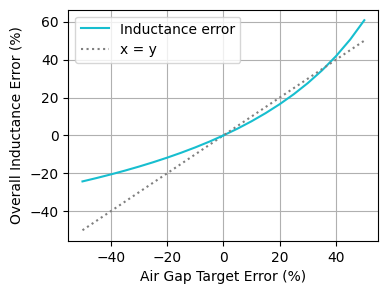

In [177]:
s_nom = s_mm # mm
Al_errorP_arr=[]
Al_errorN_arr=[]
e_arr=list(np.arange(0,55,5))
for error in e_arr:
    s_min = s_nom*(1-error/100)
    s_max = s_nom*(1+error/100)
    Al_max= (s_min**K2)*K1
    Al_min= (s_max**K2)*K1
    Al_errorP= 100*(Al_max-Al_nH)/Al_nH # \% of error of nH
    Al_errorN= 100*(Al_min-Al_nH)/Al_nH # \% of error of nH

    Al_errorP_arr.append(Al_errorP)
    Al_errorN_arr.append(Al_errorN)
plt.subplots(figsize=(4,3))
plt.plot(e_arr,Al_errorP_arr,
         c="C9",label="Inductance error")
plt.plot([-50,50],[-50,50],c="C7", 
         linestyle = 'dotted',label="x = y")

plt.plot(-np.array(e_arr),Al_errorN_arr,c="C9") 
plt.grid(which="both")
plt.xlabel("Air Gap Target Error (%)")
plt.ylabel("Overall Inductance Error (%)")
plt.legend()
plt.show()


**The cores listed below are verified, but only the ‘ELP 58/11/38’ yields a B_peak below 300 mT.** 

In [15]:
t= """core,Ae_min(mm2)
ELP 22/6/16 with ELP 22/6/16,78.3 
ELP 32/6/20 with ELP 32/6/20,128
ELP 38/8/25 with ELP 38/8/25,192
ELP 43/10/28 with ELP 43/10/28,217
ELP 58/11/38 with ELP 58/11/38,308""".split("\n")
t= [x.split(",") for x in t]
df = pd.DataFrame(t[1:], columns = t[0])
Aemin = df["Ae_min(mm2)"].astype("float32")
B_peak = 1e-3*Lr_uH*sqrt(2)*Ir_rms/(n*Aemin*1e-6) # mT
df["B_peak(mT)"]=B_peak
df

,core,Ae_min(mm2),B_peak(mT)
0,ELP 22/6/16 with ELP 22/6/16,78.3,1019.056152
1,ELP 32/6/20 with ELP 32/6/20,128,623.375732
2,ELP 38/8/25 with ELP 38/8/25,192,415.583832
3,ELP 43/10/28 with ELP 43/10/28,217,367.705536
4,ELP 58/11/38 with ELP 58/11/38,308,259.065247


### More than 4 turns 

Below the B_peak of rach core, with number of turns : (same formulas as above)

In [178]:
t= """core,Ae_min(mm2)
ELP 22/6/16 with ELP 22/6/16,78.3 
ELP 32/6/20 with ELP 32/6/20,128
ELP 38/8/25 with ELP 38/8/25,192
ELP 43/10/28 with ELP 43/10/28,217
ELP 58/11/38 with ELP 58/11/38,308""".split("\n")
t= [x.split(",") for x in t]
df = pd.DataFrame(t[1:], columns = t[0])
Aemin = df["Ae_min(mm2)"].astype("float32")
for n in range(1, 9):
    B_peak = 1e-3*Lr_uH*sqrt(2)*Ir_rms/(n*Aemin*1e-6) # mT
    df[f"B_peak n={n}"]=B_peak
df = df.set_index("core").T
df

core,ELP 22/6/16 with ELP 22/6/16,ELP 32/6/20 with ELP 32/6/20,ELP 38/8/25 with ELP 38/8/25,ELP 43/10/28 with ELP 43/10/28,ELP 58/11/38 with ELP 58/11/38
Ae_min(mm2),78.3,128,192,217,308
B_peak n=1,4076.224609,2493.50293,1662.335327,1470.822144,1036.260986
B_peak n=2,2038.112305,1246.751465,831.167664,735.411072,518.130493
B_peak n=3,1358.741455,831.167664,554.111755,490.274017,345.420349
B_peak n=4,1019.056152,623.375732,415.583832,367.705536,259.065247
B_peak n=5,815.244873,498.700623,332.467072,294.164429,207.252197
B_peak n=6,679.370728,415.583832,277.055878,245.137009,172.710175
B_peak n=7,582.317749,356.214722,237.476486,210.117432,148.037292
B_peak n=8,509.528076,311.687866,207.791916,183.852768,129.532623


The cases with B_peak < B_sat

In [180]:
df2= df.drop('Ae_min(mm2)', axis=0)
for c in df2.columns:
    m= df2[c]>300
    df2.loc[m,c]=np.nan
# Drop columns that are completely NaN
df2 = df2.dropna(axis=1, how='all')

# Drop rows that are completely NaN
df2 = df2.dropna(axis=0, how='all')
df2["n"]=df2.reset_index()["index"].str.split("=").\
    str[1].values.astype("int")
df2=df2.set_index("n")
df2#.astype("Int")

core,ELP 38/8/25 with ELP 38/8/25,ELP 43/10/28 with ELP 43/10/28,ELP 58/11/38 with ELP 58/11/38
n,,,
4,NaN,NaN,259.065247
5,NaN,294.164429,207.252197
6,277.055878,245.137009,172.710175
7,237.476486,210.117432,148.037292
8,207.791916,183.852768,129.532623


Remind the relationship Between Inductance Ratio and Number of Turns

In [99]:
pd.DataFrame(np.array([list(range(1,10)),
                       [1e3*Lr_uH/n**2 for n in range(1,10)]]).T,
            columns = ["Nb", "Al_nH"]).T.round()

,0,1,2,3,4,5,6,7,8
Nb,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
Al_nH,21797.0,5449.0,2422.0,1362.0,872.0,605.0,445.0,341.0,269.0


Case of turns number = 7

In [185]:
%%render 
N = 7
Al_nH = 340
Al_nom= 355 # ELP43/10/28, Gapped, see below 

<IPython.core.display.Latex object>

In [190]:
fig_counter =  One_figure_with_captions(fig_counter,
                                        img1="ELP432.png", 
                                        caption1="TDK, ELP43/10/28 datasheet screenshot", 
                                        first_part_path="./02_figs/", 
                                        width=18)

Below a core set thant meet aour calculation in mouser: 

In [187]:
fig_counter =  One_figure_with_captions(fig_counter,
                                        img1="ELP43.png", 
                                        caption1="Mouser, TDK, ELP43/10/28 N97 7500 +25% -25%, B66291G0000X197", 
                                        first_part_path="./02_figs/", 
                                        width=18)

**Max current of each layer**

In [193]:
fig_counter =  One_figure_with_captions(fig_counter,
                                        img1="ELP433.jpg", 
                                        caption1="PCB copper trace proposition: 2 turns by layer", 
                                        first_part_path="./02_figs/", 
                                        width=10)

We will use the same formula as in the section `Choice of the transformer core ELP 64 vs ELP 102`. Using this, we can determine the current for the inner and outer layers.
<BR>
From the datasheet:  

In [198]:
df = pd.DataFrame([
    { "core":"ELP 43","E":35.4,"F":8.1,"Margin":3}
])
df

,core,E,F,Margin
0,ELP 43,35.4,8.1,3


The following table summarizes all results for ELP 43, for both outer and inner layers (Copper layer of 2 oz/ft²), and delta Temp = 30°C 

In [208]:
DT= 30
thicknessum = 70 # 2.0 oz ==> 70.00 µm
arr = []
for i in range(len(df)):
    for kind_ in ["outer", "inner"]:
        dic = df.iloc[i].to_dict()
        dic["kind"]= kind_
        core = dic["core"]
        a= (dic ["E"]-dic ["F"])/2
        b= a-2*dic['Margin']
        wmm= (b) # mm
        dic["wmm"]=wmm
        I = ipc2221current(wmm, thicknessum, DT=DT, kind = kind_)
        dic["Current"]= I
        arr.append(dic)
pd.DataFrame(arr)

,core,E,F,Margin,kind,wmm,Current
0,ELP 43,35.4,8.1,3,outer,7.65,28.023109
1,ELP 43,35.4,8.1,3,inner,7.65,14.011555


Reminde the RMS max current of the `Lr`

In [256]:
%%render 
Ir_rms # Arms < Imax inner layer 

<IPython.core.display.Latex object>

## References 

<a id="referencesID1232"></a> [1] [TDK, Ferrites and accessories, E cores General information](https://www.tdk-electronics.tdk.com/download/531516/f119bbe0ab3d6dd73ae31c6fa9dcf6b9/pdf-ecoresgeneralinformation.pdf)
<br> 
<a id="referencesID1233"></a> [2] [TDK, Ferrites and accessories, Processing notes](https://www.tdk-electronics.tdk.com/download/531538/d5537837a7b4f3cd2fc2e7da8e093820/pdf-processingnotes.pdf)
<br>
<a id="referencesID1234"></a> [3] [TDK, EPCOS Data Book 2013](https://www.tdk-electronics.tdk.com/download/519704/069c210d0363d7b4682d9ff22c2ba503/ferrites-and-accessories-db-130501.pdf)
<br>
<a id="referencesID1235"></a> [4] [TDK, Planar Cores for Power Applications](https://www.tdk-electronics.tdk.com/download/2527778/1e429cb7ad3fd0be062bcfe03f8ed498/ferrites-planar-cores-pb.pdf)
<br>
<a id="referencesID1236"></a> [5] [IPC-2221A, Generic Standard on Printed Board Design](https://www-eng.lbl.gov/~shuman/NEXT/CURRENT_DESIGN/TP/MATERIALS/IPC-2221A(L).pdf)





**Datasheets of the transformer core candidates**<br>
https://www.ferroxcube.com/upload/media/product/file/Pr_ds/E64_10_50.pdf <br>
https://www.tdk-electronics.tdk.com/inf/80/db/fer/elp_43_10_28.pdf <br>
https://product.tdk.com/system/files/dam/doc/product/ferrite/ferrite/ferrite-core/data_sheet/80/db/fer/elp_64_10_50.pdf <br>
https://www.ferroxcube.com/upload/media/product/file/Pr_ds/E64_10_50_PLT64_50_5.pdf <br>
https://www.ferroxcube.com/upload/media/product/file/Pr_ds/ER64_13_51.pdf <br>
https://product.tdk.com/system/files/dam/doc/product/ferrite/ferrite/ferrite-core/data_sheet/80/db/fer/e_100_60_28.pdf <br>
https://product.tdk.com/system/files/dam/doc/product/ferrite/ferrite/ferrite-core/data_sheet/80/db/fer/elp_102_20_38.pdf <br>
https://www.tdk-electronics.tdk.com/inf/80/db/fer/e_80_38_20.pdf

**Datasheets of the resonant inductor core candidates**
<br>
https://www.tdk-electronics.tdk.com/inf/80/db/fer/elp_22_6_16.pdf<br>
https://www.tdk-electronics.tdk.com/inf/80/db/fer/elp_32_6_20.pdf<br>
https://www.tdk-electronics.tdk.com/inf/80/db/fer/elp_38_8_25.pdf<br>
https://www.tdk-electronics.tdk.com/inf/80/db/fer/elp_43_10_28.pdf<br>
https://www.tdk-electronics.tdk.com/inf/80/db/fer/elp_58_11_38.pdf